# Logistic Regression Tutorial
---
According to [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression), logistic regression is widely used for binary classification (in economics, discrete choice). Logistic regression was developed by statistician David Cox in 1958. The binary logistic model is used to estimate the probability of a binary response based on one or more predictor (or independent) variables (features). It allows one to say that the presence of a risk factor increases the odds of a given outcome by a specific factor.

## Import packages
---
Import packages to make most of the third-party functions work. 

In [1]:
# set matplotlib output will show in notebook
%matplotlib inline

#------- Package of drawing figures --------- 

# main canvas
import matplotlib.pyplot as plt
# 3D space function
from mpl_toolkits.mplot3d import Axes3D
# tranfer multiple figure to animation
from matplotlib import animation
# display videos plugin
from IPython.display import HTML

#-----  Package of matrix computing --------- 
import numpy as np

In [2]:
# load sklearn iris dataset
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data  
Y = iris.target
# bridge sklearn dataset to our simple implementation
# pull out only one label

dataset=[]
target_label=2 # choose a flower type to generate data that whether is this type of flower or not

for idx,x in enumerate(X):
    transform_label=None
    
    if Y[idx]==target_label:
        transform_label=1 # is this flower type
    else:
        transform_label=0 # is not this flower type

    x=np.array([x[0],x[2]])
    dataset.append((x,transform_label))
    
dataset=np.array(dataset)

Let us see how this data perform by plotting on a 2D canvas: you can see our manually picked attributes for determining which type of iris is whether linear separatable or not.

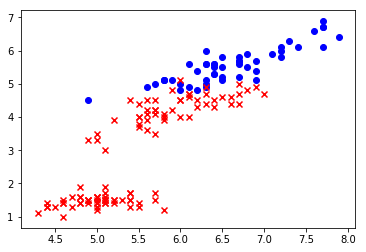

In [3]:
# show current dataset distribution
plt.scatter([v[0][0] for v in dataset if v[1]==1],[v[0][1] for v in dataset if v[1]==1],c="b",marker="o")
plt.scatter([v[0][0] for v in dataset if v[1]==0],[v[0][1] for v in dataset if v[1]==0],c="r",marker="x")
plt.show()

In [4]:
from sklearn.metrics import accuracy_score
from sklearn import linear_model, datasets

logreg = linear_model.LogisticRegression()

# get the IRIS features from dataset 
X = np.array([v[0] for v in dataset])

# get the IRIS label from dataset (0,1) 
Y = np.array([v[1] for v in dataset])

# train the logistic model 
model = logreg.fit(X,Y)

# get the model weight
w =  model.coef_[0]

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

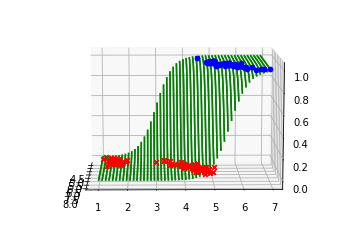

In [6]:

# show result

ps = [v[0] for v in dataset]
label = [v[1] for v in dataset]
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')

# feature list
tpx1=[]
tpx2=[]

def init():
    for idx,Label in enumerate(label):
        # feature 1
        px1=ps[idx][0]
        # feature 2
        px2=ps[idx][1]
        
        # feature list
        tpx1.append(px1)
        tpx2.append(px2)
        
        # if label = 1, draw blue circle
        if Label==1:
            ax1.scatter(px1, px2, 1, c='b', marker="o", label='O')
        
        # if label = 0, draw red  cross
        else:
            ax1.scatter(px1, px2, 0, c='r', marker="x", label='X')

    # get each point from value range
    x1_list = np.linspace(min(tpx1),max(tpx1))
    x2_list = np.linspace(min(tpx2),max(tpx2))
   
    # fixed x2 and choose each x1 and draw line
    # repeat this step and run each x2
    for x2 in x2_list:
        # set the same length as x1_list
        x2 = [x2]* len(x1_list)
        # transfer to numpy arra
        x2 = np.array(x2)
        # draw the line 
        ax1.plot(x1_list, x2, sigmoid(w[0] * x1_list + w[1] * x2), 'g-')

    return fig



def animate(i):
    ax1.view_init(elev=10., azim=i)
    return fig

# build animation
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=15)
# show the video
HTML(anim.to_html5_video())

